In [1]:
import string
import itertools
import os
import subprocess
import random
import string
import re
import hashlib
import json
import codecs

patternfile = "data/pattern.txt"
os.makedirs(os.path.dirname(patternfile), exist_ok=True)

lengths = [i for i in range(10,36,4)]
# lengths = [3,4]

class CustomRuntimeError(Exception):
    """Something failed in runtime"""
    def __init__(self,filename,message):
        self.filename = filename
        self.message = message

def randomString(stringLength=256, subject=True,num = 2,patternNum = 1):
    """Generate a random string of fixed length """
    letters = string.ascii_lowercase
    if subject:
        chunk = 1024*1024*128 # 128MB
        if os.path.exists("./data/subject.txt"):
          os.remove("./data/subject.txt")
        with open("./data/subject.txt","a+") as s:
            for j in range(0,int(((stringLength+chunk-1)/chunk))):
                    rightBound = (j+1)*chunk if (j+1) * chunk < stringLength else stringLength
                    randomStr = ''.join(random.choice(letters[:num]) for i in range(j*chunk,rightBound))
                    s.write(randomStr)
    else:
        pats = '\n'.join([''.join(random.choice(letters[:num]) for i in range(stringLength)) for x in range(0,patternNum)])
#         randomStr =  ''.join(random.choice(letters[:num]) for i in range(stringLength))
        pats = pats + '\n'
        with open("./data/pattern_single.txt","w") as s:
            s.write(pats)

# randomString(stringLength=1024*1024*1024*2,subject=True)
# sorted([1,5,3,4])

realWorldPatterns = [
                     b'\x1A\x45\xDF\xA3\x93\x42\x82\x88\x6D\x61\x74\x72\x6F\x73\x6B\x61', #MKV
                     b'\x25\x50\x44\x46',#PDF
                     b'\x37\x7A\xBC\xAF\x27\x1C', #7-zip
                     b'\x38\x42\x50\x53', #PSD
                     b'\x50\x4B\x03\x04',#ZIP
#                      b'\x89\x50\x4E\x47\x0D\x0A\x1A\x0A', #PNG has ''\n'
                     b'\xD0\xCF\x11\xE0\xA1\xB1\x1A\xE1', #DOC
                     b'\x4D\x5A', #DLL
                     b'\x3C\x21\x64\x6F\x63\x74\x79\x70', #HTML
                     b'\x1F\x8B\x08', #TAR?
                     b'\x66\x74\x79\x70\x4D\x53\x4E\x56', #MP4
                     b'\xBE\xBA\xFE\xCA\x0F\x50\x61\x6C\x6D\x53\x47\x20\x44\x61\x74\x61',
#                      b'\x7E\x45\x53\x44\x77\xF6\x85\x3E\xBF\x6A\xD2\x11\x45\x61\x73\x79\x20\x53\x74\x72\x65\x65\x74\x20\x44\x72\x61\x77',
                     b'\x7C\x4B\xC3\x74\xE1\xC8\x53\xA4\x79\xB9\x01\x1D\xFC\x4F\xDD\x13',
                     b'\x5B\x57\x69\x6E\x64\x6F\x77\x73\x20\x4C\x61\x74\x69\x6E\x20',
#                      b'\x5B\x47\x65\x6E\x65\x72\x61\x6C\x5D\x0D\x0A\x44\x69\x73\x70\x6C\x61\x79\x20\x4E\x61\x6D\x65\x3D\x3C\x44\x69\x73\x70\x6C\x61\x79\x4E\x61\x6D\x65', #has '\n'
#                      b'\x4D\x69\x63\x72\x6F\x73\x6F\x66\x74\x20\x56\x69\x73\x75\x61\x6C\x20\x53\x74\x75\x64\x69\x6F\x20\x53\x6F\x6C\x75\x74\x69\x6F\x6E\x20\x46\x69\x6C\x65',
                     b'\x4F\x50\x4C\x44\x61\x74\x61\x62\x61\x73\x65\x46\x69\x6C\x65',
                     b'\x50\x41\x47\x45\x44\x55\x36\x34',
                     b'\x50\x4B\x05\x06\x50\x4B\x07\x08',
                     b'\x52\x65\x74\x75\x72\x6E\x2D\x50\x61\x74\x68\x3A\x20',
                     b'\x14\x66\x74\x79\x70\x69\x73\x6F\x6D',
                     b'\x18\x66\x74\x79\x70\x33\x67\x70\x35',
                     b'\x43\x57\x53',
                     b'\x46\x57\x53',
                     b'\x47\x49\x46\x38\x37\x61',
                     b'\x47\x49\x46\x38\x39\x61',
                     b'\x49\x20\x49',
                     b'\x49\x44\x33',
#                      b'\x3C\x3F\x78\x6D\x6C\x20\x76\x65\x72\x73\x69\x6F\x6E\x3D',
#                      b'\x3C\x3F\x78\x6D\x6C\x20\x76\x65\x72\x73\x69\x6F\x6E\x3D\x22\x31\x2E\x30\x22\x3F\x3E',
#                      b'\x43\x6C\x69\x65\x6E\x74\x20\x55\x72\x6C\x43\x61\x63\x68\x65\x20\x4D\x4D\x46\x20\x56\x65\x72\x20',
#                      b'\x49\x53\x63\x28',
#                      b'\x49\x54\x53\x46',
#                      b'\x4D\x69\x63\x72\x6F\x73\x6F\x66\x74\x20\x43\x2F\x43\x2B\x2B\x20',
                    ]

# print(bytes('\n','hex'))
l = [b'AB',
    b'ABG',
    b'BEDE',
    b'ED']
# pats = [(b'\n'.join(sorted(realWorldPatterns)) + b'\n') for i in range(0,1)]
pats = []
with open('data/raw_snort_content.json','rb') as rp:
    source = rp.read()
    pats = list(set(map(lambda x : bytes(x),json.loads(source))))
print(max(map(lambda x : len(x), pats)))
# # print(len(pats))
pats = (b'\n'.join(sorted(pats[:272])) + b'\n')
# # pats = pats[0] + b'\n'

with open("./data/snort_pats.txt","wb") as s:
            s.write(pats) #PDF + TAR
        
def dump_dir(path,name):
    if os.path.exists(path):
        files = [os.path.join(path,f) for f in os.listdir(path) if (os.path.isfile(os.path.join(path,f)))]
        dirs = [os.path.join(path,d) for d in os.listdir(path) if (os.path.isdir(os.path.join(path,d)))]
        with open(f"data/{name.split('/')[-1]}dump","ab") as fa:
            for f in files:
                with open(f,"rb") as fr:
                    fa.write(fr.read())
        for d in dirs:
            dump_dir(d,name)
        
def dump(path):
    if os.path.exists(f"data/{path.split('/')[-1]}dump"):
                os.remove(f"data/{path.split('/')[-1]}dump")
    dump_dir(path,path)

def memory_dump(path,offset,size):
    if os.path.exists(path):
        if os.path.isdir(path):
            pdf_files = [f for f in os.listdir(path) if (os.path.isfile(os.path.join(path, f)) and f.split('.')[-1]=="pdf")]
            if os.path.exists(f"data/{path.split('/')[-1]}dump"):
                os.remove(f"data/{path.split('/')[-1]}dump")
            with open(f"data/{path.split('/')[-1]}dump","wb+") as fw:
                for f in pdf_files:
                    with open(os.path.join(path,f),"rb") as src:
                        fw.write(src.read())
        else:
            chunk = 1024*1024*128
            with open(path,"rb") as dr:
                if os.path.exists(f"data/{path.split('/')[-1]}dump"):
                    os.remove(f"data/{path.split('/')[-1]}dump")
                with open(f"data/{path.split('/')[-1]}dump","wb+") as fw:
                    dr.seek(offset)
                    for j in range(0,int(((size+chunk-1)/chunk))):
                        rightBound = (j+1)*chunk if (j+1) * chunk < size else size
                        leftBound = j*chunk
                        fw.write(dr.read(rightBound-leftBound))
    else:
        raise CustomRuntimeError(path,"path does not exist")
        
# memory_dump("/home/alekseey_tyurin_gmail_com/specialization/pdfs",0,0)

#PFAC benchmark

# path to nvprof
nvprof = "/usr/local/cuda-10.2/bin/nvprof"

files = ["pfac.txt"]

# programs = ["ImpalaNaive","ImpalaNaiveOpt","PfacGlobal","ImpalaCorasick", "CudaNaiveOpt", "CudaNaiveOptSpec","CudaNaiveOptSpecNU","CudaNaiveOptSpecNUBW", "CudaCorasickSpec"]
programs = ["ImpalaNaiveOpt","PfacGlobal","ImpalaCorasick","CudaCorasickSpec"]
# programs = ["MatchSpec","MatchConst","MatchGlobal","MatchConstManual"]

def match(patternfile,datafile,size):
    commands = [
#             f"{nvprof} --normalized-time-unit ms ./{p} --patternfile={patternfile} --datafile={datafile} --size={size} 2> {p}-prof.txt" for p in programs
        f"./{p} --patternfile={patternfile} --datafile={datafile} --size={size} 1> {p}-prof.txt" for p in programs
    ]
    
    for command in commands:
        if(os.system(command) == 0):
            continue
        raise CustomRuntimeError(command,"")
# Nvprof based

# def time():
# #     rePatt = [re.compile('PFAC_kernel_timeDriven<int=256, int=128, int=0, int=1>'), re.compile('lambda_\w*')]
#     rePatt = re.compile('FAC_kernel_timeDriven<int=256, int=128, int=0, int=1>|lambda\w*')
#     result = []
#     for file in programs:
#         success = False
#         with open(f'{file}-prof.txt',"rb") as mN:
#             for line in mN.readlines():
#                 ld = line.decode('utf-8')
# #                 for regExp in rePatt:
#                 if (rePatt.findall(ld) != []):
#                     result.append(ld)
#                     success = True
# #                     i = i + 1
#             if(not success):
#                 with open(file) as f:
#                     raise CustomRuntimeError(file,f.readlines())

#     return(result)


# rePatt = re.compile('[\d]+\.?[\d]*')
reNumber = re.compile('[-+]?[0-9]*\.?[0-9]+[eE]?[-+]?[0-9]+')


#size, offset in MB
# def checkTimeStatic(size,filename,patterns):
#     res = []
#     for p in patterns:
#         with open(patternfile, 'wb') as fb:
#                  fb.write(p)
#         match(patternfile,filename,size*1024*1024)
#         clocks = []
#         for line in time():
#             clocks.append(rePatt.findall(line))
#         entry = [x[1] for x in clocks] # x[1] is time
#         res.append(entry)
#     return res



class Runner():
    
    def __init__(self,sizes,patterns,filename,patSizes = [],offset = 0,verbose=0):
        self.filename = filename
        self.sizes = sizes
        self.patSizes = patSizes
        self.patterns = patterns
        self.offset = offset
        self.verbose = verbose #print results or not
        self.output_file = f"check_time_{self.filename.split('/')[-1]}"
        self.match_count = []
        
    def time(self):
#     rePatt = [re.compile('PFAC_kernel_timeDriven<int=256, int=128, int=0, int=1>'), re.compile('lambda_\w*')]
        rePatt = re.compile('runtime')
        result = []
        match_count = False
        for file in programs:
            success = False
            with open(f'{file}-prof.txt',"rb") as mN:
                for line in mN.readlines():
                    try:
                        ld = line.decode('utf-8')
                    except UnicodeDecodeError:
                        continue
                    if (rePatt.findall(ld) != []):
                        result.append(ld)
                        success = True
                    if (not match_count and re.compile("Match count").findall(ld) != []):
                        self.match_count.append(int(reNumber.findall(ld)[0]))
                        match_count = True
                if(not success):
                    with open(file) as f:
                        raise CustomRuntimeError(file,f.readlines())
        return(result)

    def checkTimeStatic(self,size,filename,patterns):
        res = []
        for p in patterns:
            with open(patternfile, 'wb') as fb:
                     fb.write(p)
            match(patternfile,filename,size*1024*1024)
            clocks = []
            for line in self.time():
                clocks.append(reNumber.findall(line))
            print(size)
            entry = [[x[0],x[1]] for x in clocks] # x[0] is time
            res.append(entry)
        return res
    
    def run(self):
        #2GB
#         randomString(1024*1024*1024*2,16)
        #dry run to compile PE
        res = []
        i = 0
        for s in self.sizes:
            try:
                if self.patSizes == []:
                    res.append(self.checkTimeStatic(s,self.filename,[(b'\n'.join(sorted(self.patterns)) + b'\n')]))
                else:
#                     print(i)
#                     print(self.patSizes[i])
                    res.append(self.checkTimeStatic(s,self.filename,[(b'\n'.join(sorted(self.patterns)[:self.patSizes[i]]) + b'\n')]))
            except CustomRuntimeError as crt:
                print(f"Error occured while trying to run tests\n {crt.message} in {crt.filename}")
                return ""
            i = i + 1
#         with open(f'check_time_{output_file}','w+') as cts:
#             cts.write(str(res))
        with open(self.output_file,'w') as cts:
            cts.write(json.dumps(res))
        return res
    

# sizes_ = [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100, 2300, 2500, 2700, 2900, 3100, 3300, 3500, 3700, 3900, 4100, 4300, 4500, 4700, 4900, 5100, 5300, 5500, 5700, 5900, 6100, 6300, 6500, 6700, 6900, 7100, 7300]

# sizes_ = [i for i in range(100,1001,50)]
patSizes = [i for i in range(16,512,32)]
sizes_ = [500 for i in range(0,len(patSizes))]

# dump("/home/alekseey_tyurin_gmail_com/specialization/Downloads")

pat_data = "/home/alekseey_tyurin_gmail_com/specialization/spec/aho-corasick/benchmarking/data/data_from_patterns"
pdf_data = "/home/alekseey_tyurin_gmail_com/specialization/spec/aho-corasick/benchmarking/data/pdfsdump"
downloads_data = "/home/alekseey_tyurin_gmail_com/specialization/spec/aho-corasick/benchmarking/data/Downloadsdump"
tcp_data = "/home/alekseey_tyurin_gmail_com/specialization/ISCX_Botnet-Testing.pcap"

# for f in os.listdir("data"):
#     if ("dump" in f) and os.path.exists(os.path.join("data",f)) and (f != "pdfsdump"):
#         os.remove(os.path.join("data",f))

# runner = Runner(sizes_[:9],pats,filename=tcp_data,patSizes=patSizes[:9])
# runner.run()

    
# print(runner.match_count)
# print(patSizes)
# print(pats[0].split(b'\n')[25])

151


<IPython.core.display.Javascript object>


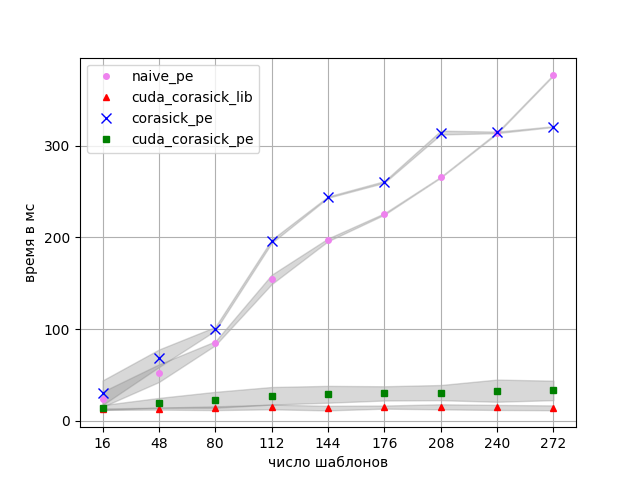

In [9]:
from functools import reduce
from IPython.display import Image
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import math
import matplotlib.ticker as plticker
import json



def red(test_list):
    res = [0 for i in range(0,len(test_list[0]))];#12
    for i in test_list: #for each pair
        for j in range(0,len(res)):#7
            res[j]+=int(i[j])
    return list(map(lambda x : x / len(test_list) ,res))

def deviation_float(test_list,avg):
    dev = [[0 for i in range(len(test_list[0][0]))] for j in range(len(test_list))] #for each size
    for i in range(len(test_list)): #for each size
        for j in range(len(test_list[i])): #for each clock
            for e in range(len(test_list[i][j])):
                val = float(test_list[i][j][e])
#                 if(val > 1 and val < 2):
#                     val = val * 1000
                dev[i][e] = dev[i][e] + (((val - avg[e][i])**2) / (len(test_list[i])-1)) #std dev
    res = [[] for i in range(len(avg))]
    for i in range(len(avg)): #for each algorithm
        for e in dev: #for each size
             res[i].append(math.sqrt(e[i]))
    return res


def build_set_float(test_list):
    size = len(test_list[0][0])
    def red_(l):
        res = [0 for i in range(0,len(l[0]))];#12
        for i in l: #for each pair
            for j in range(0,len(res)):#7
                value = float(i[j])
                res[j]+=value
        return list(map(lambda x : x / len(l) ,res))
    
    res = [[] for i in range(0,size)]
    for i in test_list: #for each text size
        data = red_(i) #average for specific run
        for j in range(0,size):
            res[j].append(data[j])
    return res

# read captured data
data = []
with open("check_time_ISCX_Botnet-Testing.pcap",'rb') as dump:
    source = dump.read()
    data = json.loads(source)
    
    
# empirical_avg = build_set_float(data)
empirical_avg = [[float(i[0][j][0]) for i in data] for j in range(0,len(data[0][0]))]

# dev = deviation_float(data,empirical_avg)
dev = [[float(i[0][j][1]) for i in data] for j in range(0,len(data[0][0]))]



mns_devplus = [[empirical_avg[j][i]+dev[j][i] for i in range(len(empirical_avg[j]))] for j in range(len(empirical_avg))]
mns_devminus = [[empirical_avg[j][i]-dev[j][i] for i in range(len(empirical_avg[j]))] for j in range(len(empirical_avg))]


# args = [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100, 2300, 2500, 2700, 2900, 3100, 3300, 3500, 3700, 3900, 4100, 4300, 4500, 4700, 4900, 5100, 5300, 5500, 5700, 5900, 6100, 6300, 6500, 6700, 6900, 7100, 7300]
# if runner.patSizes == []:
# args = sizes_
args = patSizes = [i for i in range(16,512,32)]

yticks = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500]
# yticks_ = [i for i in range(0,501,50)]

points = len(data)

plt.yticks([i for i in range(0,1100,100)])
# plt.xticks((args[2::5]) + [7300])
plt.xticks(args)
plt.grid()


plt.fill_between(args[:points],mns_devplus[0],mns_devminus[0],interpolate=False,color='gray', alpha=0.3)
plt.fill_between(args[:points],mns_devplus[1],mns_devminus[1],interpolate=False,color='gray', alpha=0.3)

plt.fill_between(args[:points],mns_devplus[2],mns_devminus[2],interpolate=False,color='gray', alpha=0.3)
plt.fill_between(args[:points],mns_devplus[3],mns_devminus[3],interpolate=False,color='gray', alpha=0.3)
# plt.fill_between(args[:points],mns_devplus[4],mns_devminus[4],interpolate=False,color='gray', alpha=0.3)
# plt.fill_between(args[:points],mns_devplus[5],mns_devminus[5],interpolate=False,color='gray', alpha=0.3)
# plt.fill_between(args[:points],mns_devplus[6],mns_devminus[6],interpolate=False,color='gray', alpha=0.3)
# plt.fill_between(args[:points],mns_devplus[7],mns_devminus[7],interpolate=False,color='gray', alpha=0.3)

# 

plt.plot(args[:points],empirical_avg[0],'o',label= "naive_pe",color='violet',markersize=4)
plt.plot(args[:points],empirical_avg[1],'^',label="cuda_corasick_lib",color='red',markersize=5)


plt.plot(args[:points],empirical_avg[2],'x',label="corasick_pe",color='blue',markersize=7)
plt.plot(args[:points],empirical_avg[3],'s',label="cuda_corasick_pe",color='green',markersize=5)
# plt.plot(args[:points],empirical_avg[4],'p',label=programs[4],color='orange',markersize=5)
# plt.plot(args[:points],empirical_avg[5],'+',label=programs[5],color='purple',markersize=5)
# plt.plot(args[:points],empirical_avg[6],'v',label=programs[6],color='aqua',markersize=5)
# plt.plot(args[:points],empirical_avg[7],'x',label=programs[7],color='orange',markersize=7)



# plt.plot(args[:points-1],empirical_avg[0][:-1],'o',label="cuda_naive",color='violet',markersize=4)
# plt.plot(args[:points-1],empirical_avg[1][:-1],'^',label="naive_partially_evaluated",color='red',markersize=5)


# plt.plot(args[:points],empirical_avg[2],'x',label=programs[2],color='blue',markersize=7)
# plt.plot(args[:points],empirical_avg[3],'s',label=programs[3],color='green',markersize=5)
# plt.plot(args[:points-1],empirical_avg[4][:-1],'p',label="cuda_corasick",color='orange',markersize=5)
# plt.plot(args[:points],empirical_avg[5],'+',label=programs[5],color='purple',markersize=5)
# plt.plot(args[:points-1],empirical_avg[6][:-1],'v',label="cuda_corasick_hand_partiallly_evaluated",color='aqua',markersize=5)

# print(empirical_avg[7])
# cuda_spec = [9.33707, 14.143, 19.0327, 24.0546, 29.2513, 34.7401, 40.3615, 48.2631, 53.6799, 59.2485, 64.3407, 70.0345, 73.5731, 79.9355, 84.0548, 89.7793, 93.5327, 99.3207, 106.455, 109.159]

# avg = [16.2598, 18.1557, 27.0928, 33.4352, 41.4758, 48.3397, 52.7394, 63.8616, 76.5505, 78.3331, 89.1359, 93.6855, 109.846, 133.725, 170.819, 223.713, 297.649, 391.146, 429.467]
# devplus = [12.735829999999998, 11.788139999999999, 16.268900000000002, 22.609, 29.6233, 32.7291, 41.3252, 57.29946, 68.3904, 66.2484, 80.16209, 91.31331, 107.28164000000001, 128.4758, 168.31348, 223.51506999999998, 297.493518, 391.10634200000004, 429.4231264]
# devminus = [19.783769999999997, 24.52326, 37.9167, 44.2614, 53.3283, 63.9503, 64.1536, 70.42374000000001, 84.7106, 90.4178, 98.10971, 96.05769000000001, 112.41036, 138.9742, 173.32451999999998, 223.91093, 297.804482, 391.185658, 429.51087359999997]


plt.ylabel('время в мc')
# plt.xlabel('length of subject string in MB')
plt.xlabel('число шаблонов')

plt.legend()


plt.show()

# uncomment to save figure
plt.savefig(f'data/PredDefendNaiveSearchorasick.pdf')
# plt.clf()


# plt.xticks(args)
# plt.grid()
# plt.plot(args[:points],runner.match_count,'x',label='match_count',color='red',markersize=6)
# plt.ylabel('число совпадений')
# plt.xlabel('число шаблонов')
# plt.legend()

# plt.show()

# plt.savefig(f'data/matches.pdf')
# print(runner.match_count)
